In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.display import display

# Step 1: Load dataset
base_dir = Path('/Users/rodmanafshar/Desktop/Scoring and Econometrics')
csv_path = base_dir / 'defaut2000.csv'

# Read original file (semicolon-separated, comma decimals)
df = pd.read_csv(csv_path, sep=';', decimal=',')

# Step 2: Clean dataset
# Coerce all columns to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace -99, -99.9, -99.99 in fata and ltdta with NaN
for col in ['fata', 'ltdta']:
    if col in df.columns:
        df.loc[df[col].isin([-99.0, -99.9, -99.99]), col] = np.nan

# Step 3: Sort (Group 1): first by yd, then by tdta
sort_cols = ['yd', 'tdta']
missing_cols = [c for c in sort_cols if c not in df.columns]
if missing_cols:
    raise KeyError(f"Missing required columns for sorting: {missing_cols}")

# Use stable sort so yd-grouping order is preserved when sorting tdta
df_sorted = df.sort_values(by=['yd', 'tdta'], ascending=[True, True], kind='mergesort')

# Preview: print first 50 rows of df_sorted
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print('Shape:', df_sorted.shape)
print('Nulls in fata/ltdta:', df_sorted[['fata','ltdta']].isna().sum().to_dict())
print('\nFirst 50 rows of df_sorted:')
display(df_sorted.head(50))


Shape: (181, 15)
Nulls in fata/ltdta: {'fata': 2, 'ltdta': 1}

First 50 rows of df_sorted:


,yd,tdta,reta,opita,ebita,lsls,lta,gempl,invsls,nwcta,cacl,qacl,fata,ltdta,mveltd
0,0,0.145539,0.383244,0.249250,0.240580,2.832563,3.196006,0.105342,0.075232,0.793606,6.452848,6.093447,0.000000,27.604182,0.027201
1,0,0.157739,0.653575,0.261918,0.215381,5.350979,5.149535,-0.002974,0.016330,0.384159,3.529916,3.398378,NaN,8.962069,0.237790
2,0,0.182360,0.218102,-0.053062,-0.356679,4.031815,3.970206,-0.257328,0.042915,0.437357,3.433004,3.179101,0.002600,3.644061,0.366079
3,0,0.196958,0.011139,0.221797,0.200671,4.025514,3.827649,0.205517,0.158391,0.595541,4.319132,3.243222,0.001032,27.631832,0.162987
4,0,0.202570,0.483833,0.280728,0.233083,2.443132,2.238314,-0.032192,0.237983,0.585332,6.133335,3.571832,0.051713,8.326772,0.293362
5,0,0.207705,0.701603,0.293906,0.249679,5.591193,5.322981,0.028347,0.060723,0.182932,2.286423,1.728043,0.002650,14.511942,0.543027
6,0,0.220777,0.710306,0.284551,0.249007,5.688633,5.524374,0.041474,0.311612,0.501099,3.632712,1.703274,0.013264,8.558541,0.302313
7,0,0.221871,0.025861,0.163300,0.101795,3.893146,4.349449,0.319319,0.197563,0.574539,5.850013,4.793296,0.103410,8.314004,0.286059
8,0,0.230931,0.287026,0.148918,0.088952,5.228790,5.148446,0.120110,0.129900,0.415277,3.798341,2.849781,0.018433,4.574257,0.420098
9,0,0.241411,0.390078,0.078594,0.053666,5.058597,4.632623,-0.147602,0.137904,0.344878,2.458537,1.565590,0.000000,4.708636,0.231489


In [10]:
from pathlib import Path
from IPython.display import display

# Save df_sorted as a new CSV in the same directory
try:
    _ = df_sorted  # check existence
except NameError:
    raise NameError('df_sorted is not defined. Run the cleaning/sorting cell first.')

# Resolve output path
base_dir = Path('/Users/rodmanafshar/Desktop/Scoring and Econometrics') if 'base_dir' not in globals() else base_dir
out_csv = base_dir / 'defaut2000_sorted.csv'

# Save without index
df_sorted.to_csv(out_csv, index=False)
print(f'Saved sorted data to: {out_csv}')

display(df_sorted.head(10))


Saved sorted data to: /Users/rodmanafshar/Desktop/Scoring and Econometrics/defaut2000_sorted.csv


,yd,tdta,reta,opita,ebita,lsls,lta,gempl,invsls,nwcta,cacl,qacl,fata,ltdta,mveltd
0,0,0.145539,0.383244,0.249250,0.240580,2.832563,3.196006,0.105342,0.075232,0.793606,6.452848,6.093447,0.000000,27.604182,0.027201
1,0,0.157739,0.653575,0.261918,0.215381,5.350979,5.149535,-0.002974,0.016330,0.384159,3.529916,3.398378,NaN,8.962069,0.237790
2,0,0.182360,0.218102,-0.053062,-0.356679,4.031815,3.970206,-0.257328,0.042915,0.437357,3.433004,3.179101,0.002600,3.644061,0.366079
3,0,0.196958,0.011139,0.221797,0.200671,4.025514,3.827649,0.205517,0.158391,0.595541,4.319132,3.243222,0.001032,27.631832,0.162987
4,0,0.202570,0.483833,0.280728,0.233083,2.443132,2.238314,-0.032192,0.237983,0.585332,6.133335,3.571832,0.051713,8.326772,0.293362
5,0,0.207705,0.701603,0.293906,0.249679,5.591193,5.322981,0.028347,0.060723,0.182932,2.286423,1.728043,0.002650,14.511942,0.543027
6,0,0.220777,0.710306,0.284551,0.249007,5.688633,5.524374,0.041474,0.311612,0.501099,3.632712,1.703274,0.013264,8.558541,0.302313
7,0,0.221871,0.025861,0.163300,0.101795,3.893146,4.349449,0.319319,0.197563,0.574539,5.850013,4.793296,0.103410,8.314004,0.286059
8,0,0.230931,0.287026,0.148918,0.088952,5.228790,5.148446,0.120110,0.129900,0.415277,3.798341,2.849781,0.018433,4.574257,0.420098
9,0,0.241411,0.390078,0.078594,0.053666,5.058597,4.632623,-0.147602,0.137904,0.344878,2.458537,1.565590,0.000000,4.708636,0.231489


In [11]:
import numpy as np
from pathlib import Path

# Preconditions
try:
    _ = df_sorted
except NameError:
    raise NameError('df_sorted is not defined. Run the sorting cell first.')

# Step 4: Split into Estimation (odd rows) and Validation (even rows)
# Number rows starting at 1 based on current order
rownum = np.arange(1, len(df_sorted) + 1)

# Create dumVE: 0 for estimation (odd), 1 for validation (even)
df_sorted = df_sorted.copy()
df_sorted['dumVE'] = np.where(rownum % 2 == 0, 1, 0)

est_mask = df_sorted['dumVE'] == 0
val_mask = ~est_mask

estimation_df = df_sorted.loc[est_mask].copy()
validation_df = df_sorted.loc[val_mask].copy()

print(f'Estimation sample: {len(estimation_df)} rows')
print(estimation_df['yd'].value_counts(dropna=False).sort_index())
print(f'Validation sample: {len(validation_df)} rows')
print(validation_df['yd'].value_counts(dropna=False).sort_index())

# Step 5: Save results
base_dir = Path('/Users/rodmanafshar/Desktop/Scoring and Econometrics') if 'base_dir' not in globals() else base_dir
est_path = base_dir / 'defaut2000_estimation.csv'
val_path = base_dir / 'defaut2000_validation.csv'

estimation_df.to_csv(est_path, index=False)
validation_df.to_csv(val_path, index=False)

print(f'Files saved:\n  Estimation: {est_path}\n  Validation: {val_path}')


Estimation sample: 91 rows
yd
0    48
1    43
Name: count, dtype: int64
Validation sample: 90 rows
yd
0    47
1    43
Name: count, dtype: int64
Files saved:
  Estimation: /Users/rodmanafshar/Desktop/Scoring and Econometrics/defaut2000_estimation.csv
  Validation: /Users/rodmanafshar/Desktop/Scoring and Econometrics/defaut2000_validation.csv


In [15]:
display(estimation_df.head(10))
display(validation_df.head(10))

,yd,tdta,reta,opita,ebita,lsls,lta,gempl,invsls,nwcta,cacl,qacl,fata,ltdta,mveltd,dumVE
0,0,0.145539,0.383244,0.249250,0.240580,2.832563,3.196006,0.105342,0.075232,0.793606,6.452848,6.093447,0.000000,27.604182,0.027201,0
2,0,0.182360,0.218102,-0.053062,-0.356679,4.031815,3.970206,-0.257328,0.042915,0.437357,3.433004,3.179101,0.002600,3.644061,0.366079,0
4,0,0.202570,0.483833,0.280728,0.233083,2.443132,2.238314,-0.032192,0.237983,0.585332,6.133335,3.571832,0.051713,8.326772,0.293362,0
6,0,0.220777,0.710306,0.284551,0.249007,5.688633,5.524374,0.041474,0.311612,0.501099,3.632712,1.703274,0.013264,8.558541,0.302313,0
8,0,0.230931,0.287026,0.148918,0.088952,5.228790,5.148446,0.120110,0.129900,0.415277,3.798341,2.849781,0.018433,4.574257,0.420098,0
10,0,0.251893,0.835250,0.059856,0.028479,4.327740,3.871256,0.045640,0.249495,0.443472,3.768200,1.309867,0.091691,2.790160,0.342466,0
12,0,0.254665,0.361590,0.227870,0.176469,6.815121,6.746934,0.097728,0.089151,0.512323,3.584032,3.102648,0.009318,10.365155,0.261363,0
14,0,0.285424,0.672930,0.149720,0.127476,3.302820,2.382374,0.011250,0.162897,0.604977,3.132475,1.691014,0.000000,1.586744,0.109396,0
16,0,0.300434,0.648204,-0.039954,-0.047786,5.764204,6.536033,0.000000,0.237458,0.082398,1.693202,0.769935,0.112903,1.637926,0.076401,0
18,0,0.306916,0.113442,0.382154,0.284486,5.089453,4.503656,0.058636,0.088190,0.171775,1.975380,1.075795,0.050480,NaN,0.579905,0


,yd,tdta,reta,opita,ebita,lsls,lta,gempl,invsls,nwcta,cacl,qacl,fata,ltdta,mveltd,dumVE
1,0,0.157739,0.653575,0.261918,0.215381,5.350979,5.149535,-0.002974,0.016330,0.384159,3.529916,3.398378,NaN,8.962069,0.237790,1
3,0,0.196958,0.011139,0.221797,0.200671,4.025514,3.827649,0.205517,0.158391,0.595541,4.319132,3.243222,0.001032,27.631832,0.162987,1
5,0,0.207705,0.701603,0.293906,0.249679,5.591193,5.322981,0.028347,0.060723,0.182932,2.286423,1.728043,0.002650,14.511942,0.543027,1
7,0,0.221871,0.025861,0.163300,0.101795,3.893146,4.349449,0.319319,0.197563,0.574539,5.850013,4.793296,0.103410,8.314004,0.286059,1
9,0,0.241411,0.390078,0.078594,0.053666,5.058597,4.632623,-0.147602,0.137904,0.344878,2.458537,1.565590,0.000000,4.708636,0.231489,1
11,0,0.252357,0.279752,0.167816,0.143546,4.393474,3.987021,0.074248,0.234012,0.548235,4.389158,2.217046,0.022144,4.582842,0.229820,1
13,0,0.270941,0.696297,0.241484,0.211502,7.207675,6.930057,0.016008,0.029971,0.085926,1.488471,1.263575,0.050603,3.764072,0.339804,1
15,0,0.293612,0.232368,0.258011,0.207032,4.733112,4.582674,0.428108,0.169831,0.534509,3.221926,2.401336,0.053051,12.474924,0.214703,1
17,0,0.303534,0.526705,0.124631,0.104620,7.262496,6.747602,0.029884,0.270629,0.671570,4.708873,2.207723,0.122462,4.158828,0.106655,1
19,0,0.313641,0.433485,0.096561,0.072070,3.341159,2.956980,0.004902,0.253364,0.411554,2.445538,1.138785,0.000000,2.476293,0.277848,1


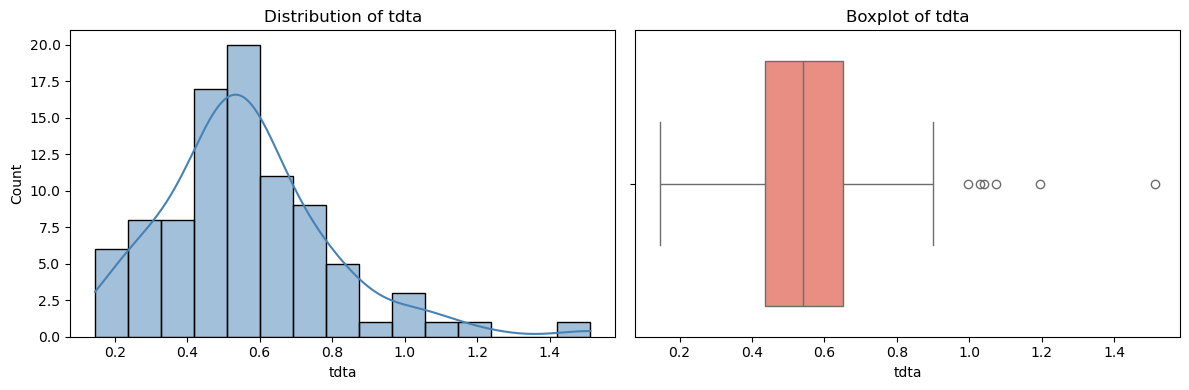

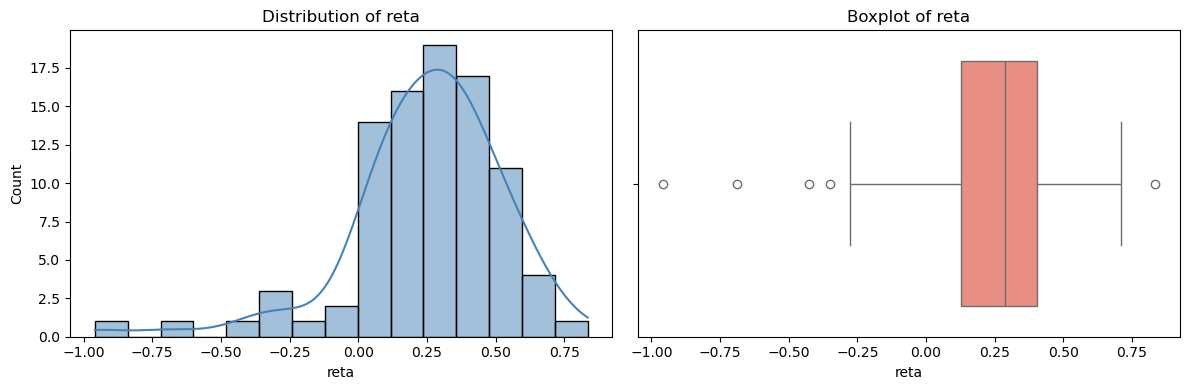

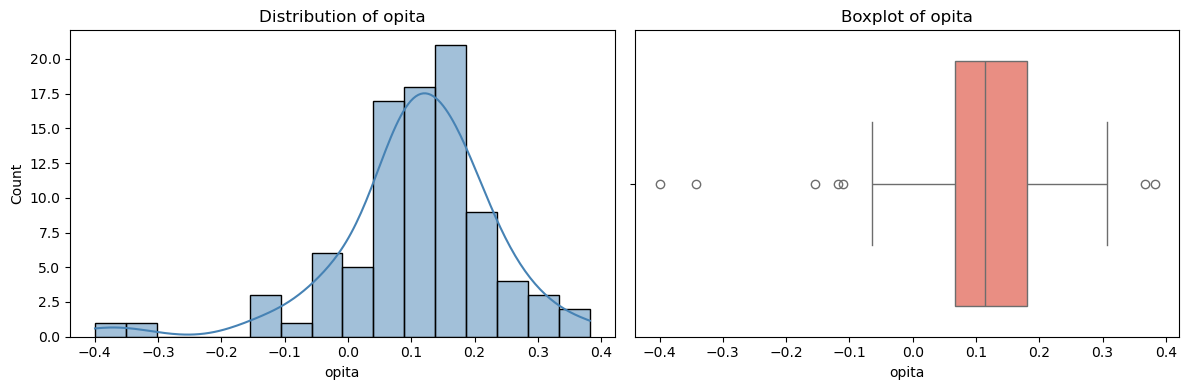

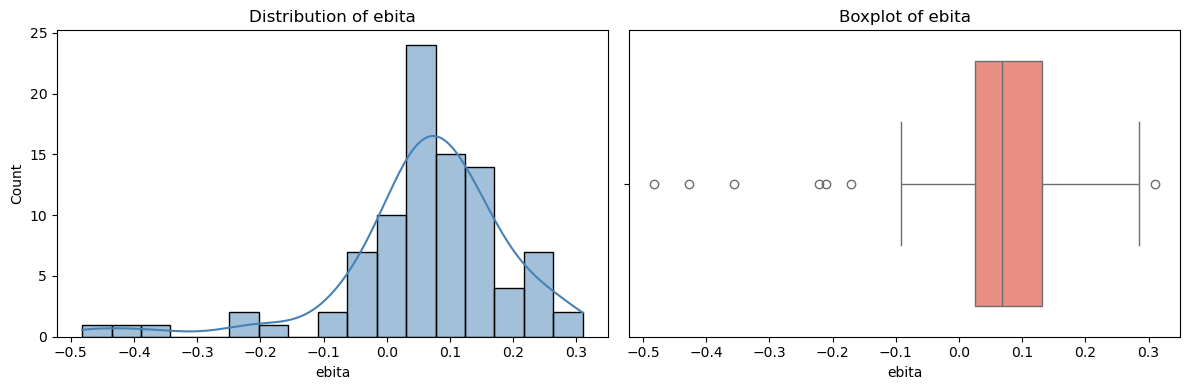

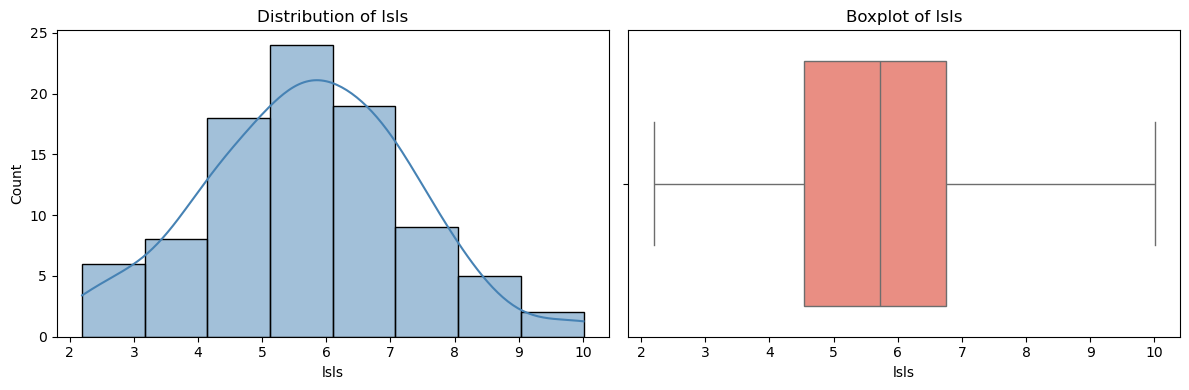

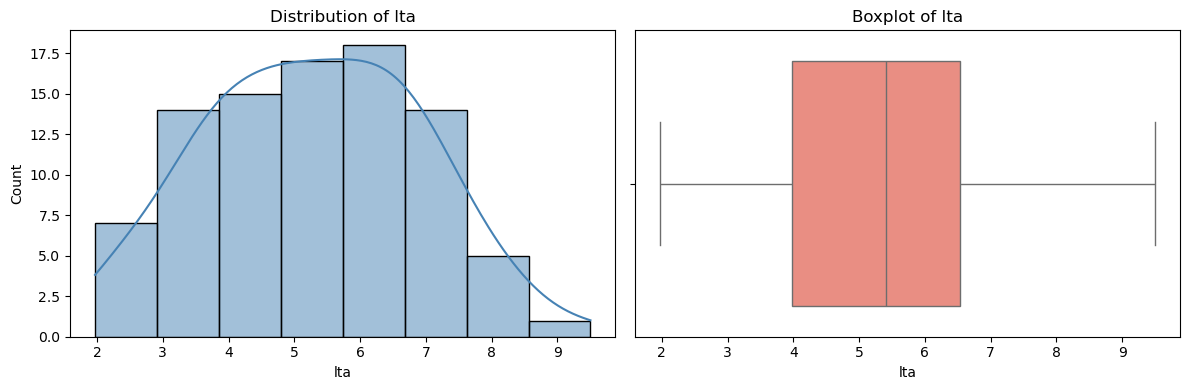

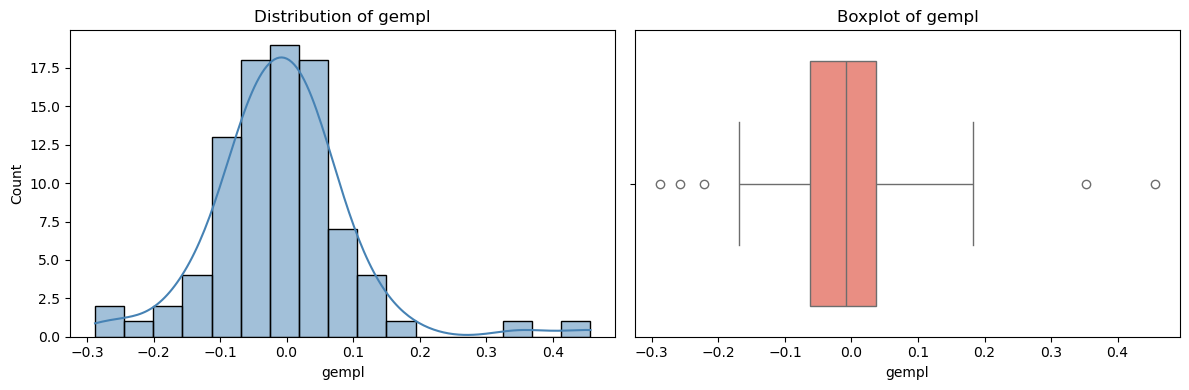

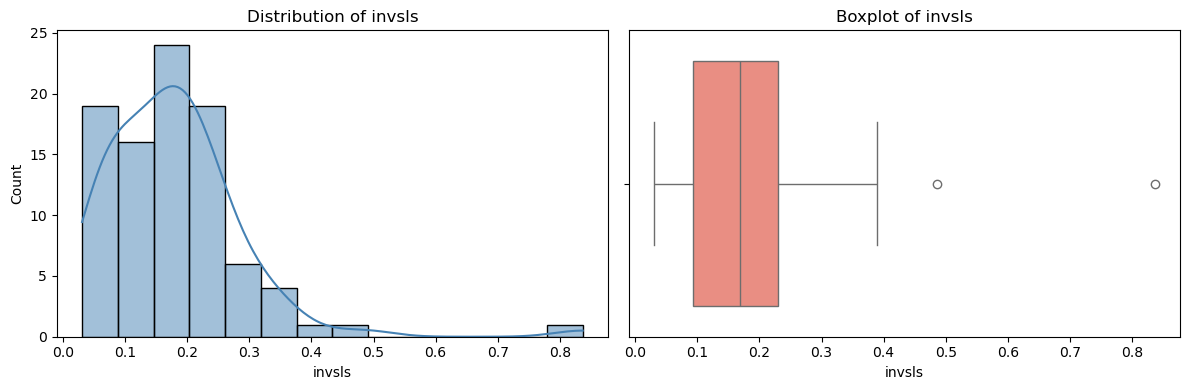

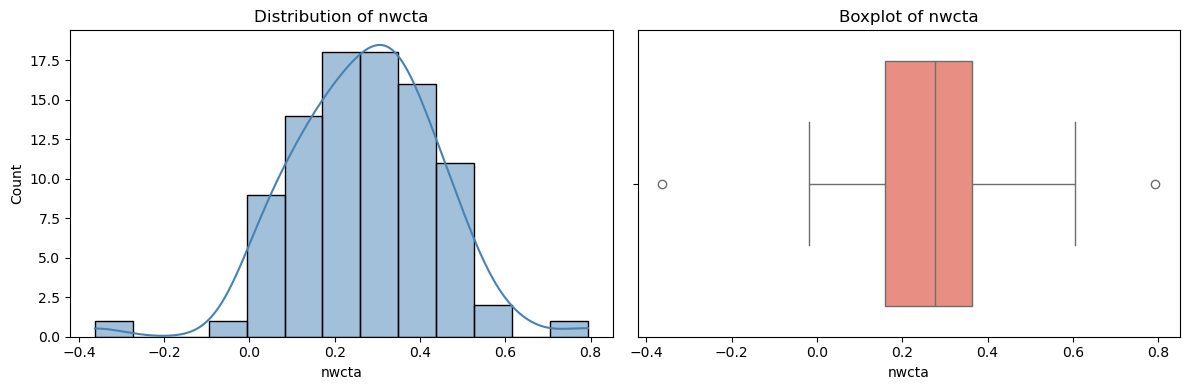

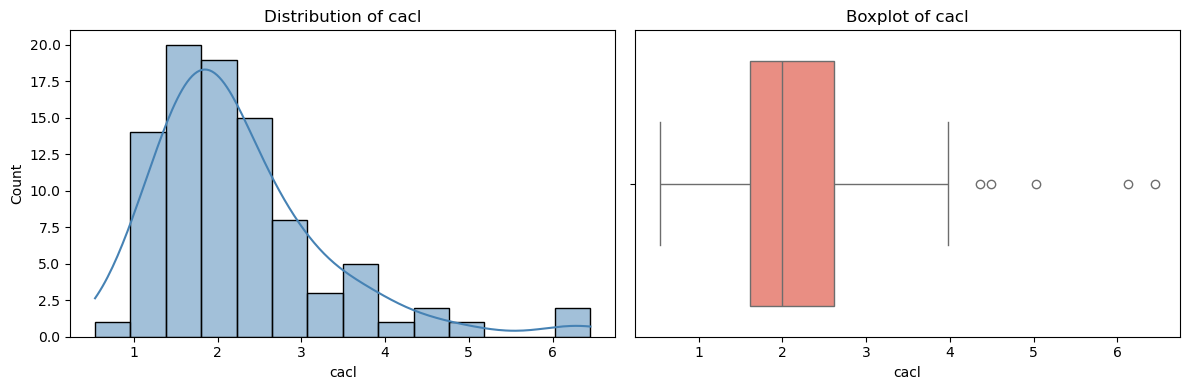

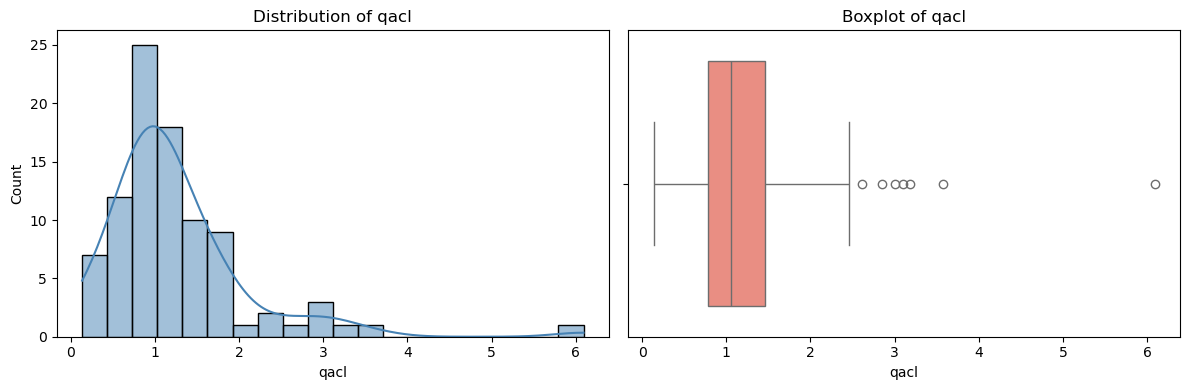

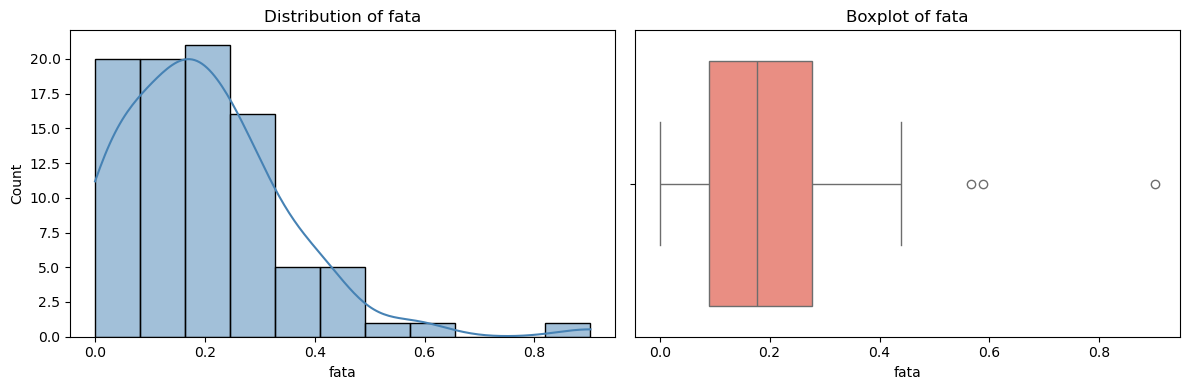

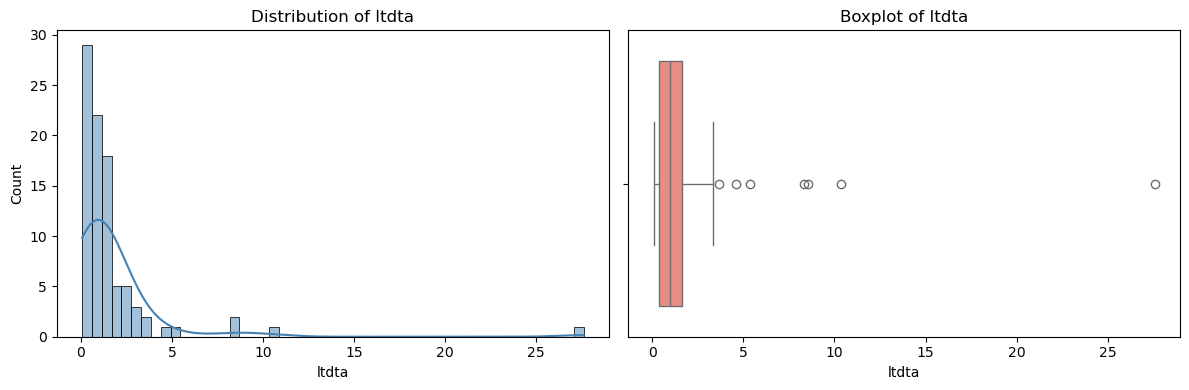

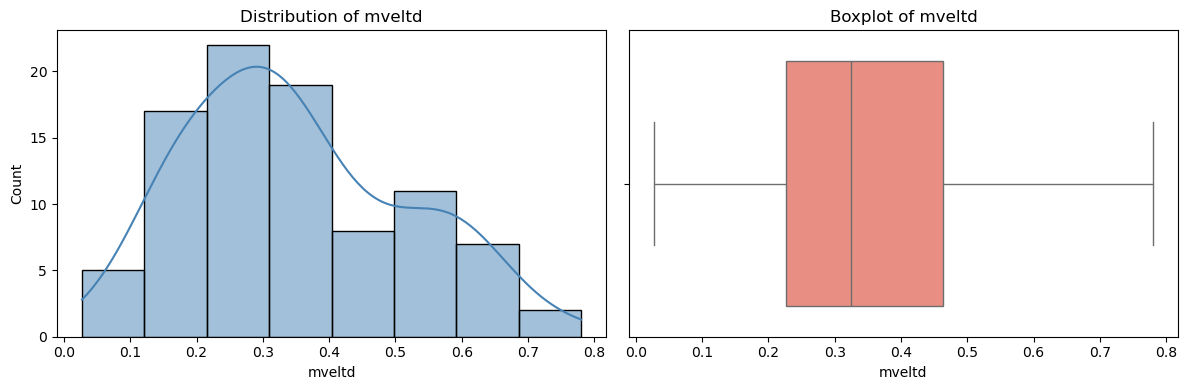

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explanatory variables (exclude yd + dumVE if present)
explanatory_vars = [c for c in estimation_df.columns if c not in ["yd", "dumVE"]]

# Plot distributions + boxplots
for var in explanatory_vars:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # Histogram + KDE
    sns.histplot(estimation_df[var].dropna(), kde=True, ax=axes[0], color="steelblue")
    axes[0].set_title(f"Distribution of {var}")
    
    # Boxplot
    sns.boxplot(x=estimation_df[var], ax=axes[1], color="salmon")
    axes[1].set_title(f"Boxplot of {var}")
    
    plt.tight_layout()
    plt.show()